<a href="https://colab.research.google.com/github/ivansst773/Aprendizaje_de_Maquina/blob/main/Ejercicios_TAM_mayo_29_y_junio_5/4_Clasificacion_Clustering_DR/8_ReduccionDimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado - reducci√≥n de dimensi√≥n

- Se presentan los conceptos y simulaciones b√°sicas relacionadas con t√©cnicas cl√°sicas lineales y no lineales de reducci√≥n de dimensi√≥n.

## An√°lisis de componentes de principales - Principal Component Analysis (PCA)

![gifpca](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*TXIbCytfgo5p5hty.gif)


- PCA busca un espacio de menor dimensi√≥n que preserve la mayor cantidad de variabilidad posible desde el espacio original (alta dimensi√≥n).

- Desde una perspectiva generativa, PCA asume que los datos $\mathbf{X} \in \mathbb{R}^{N \times P}$ son generados desde un espacio de baja dimensi√≥n (espacio latente) $\mathbf{Z} \in \mathbb{R}^{N \times M}$, donde $M < P$:

\begin{equation}
\mathbf{X} = \mathbf{Z} \mathbf{W}^T,
\end{equation}

- $\mathbf{Z}=\mathbf{X}\mathbf{W}$: matriz de baja dimensi√≥n.
- $\mathbf{W} \in \mathbb{R}^{P \times M}$: componentes principales (loading vectors).

El problema de optimizaci√≥n desde el punto de vista generativo:

\begin{align}
\mathbf{W}^*=&\arg\min_\mathbf{W} \|\mathbf{X}-\mathbf{Z} \mathbf{W}^T\|_F \\
   \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}



- PCA tambi√©n puede resolverse maximizando la varianza de los datos proyectados.

- Asumiendo datos centralizados $\mathbf{X}$, la covarianza $\mathbf{\Sigma}\in \mathbb{R}^{P \times P}$ se define como:

\begin{equation}
\mathbf{\Sigma} = \frac{1}{N} \mathbf{X}^T \mathbf{X}.
\end{equation}

- El problema de optimizaci√≥n de PCA se puede reescribir como:

\begin{align}
\mathbf{W}^*=&\arg\max_\mathbf{W} \text{tr}(\mathbf{W}^T \mathbf{\Sigma} \mathbf{W}),\\
 \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}


- La soluci√≥n del problema se centra en los $M$ vectores propios de la matriz de covarianza, correspodiente a los $M$ valores propios m√°s altos.

- Ver la demostraci√≥n [PCA generativo a PCA por varianza](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf).


**Ejemplo:** Construyamos un conjunto de datos 3D del famoso dato sint√©tico rollo Suizo - Swiss Roll.

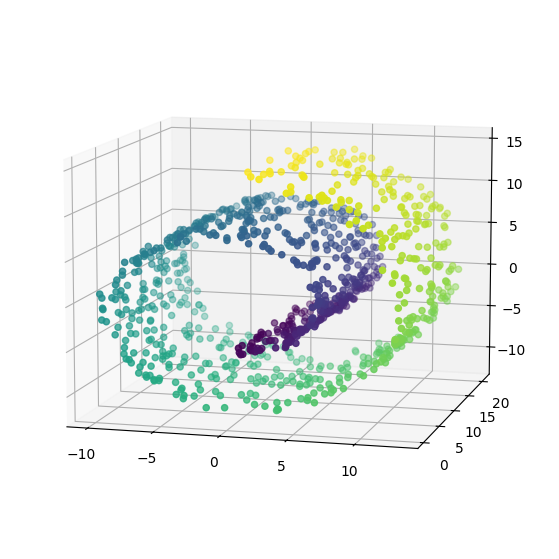

In [2]:
from sklearn.datasets import make_swiss_roll
import numpy as np
import matplotlib.pyplot as plt

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
#t contiene el orden estructural de los datos
#crear scatter en 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

**NOTA:** PCA supone que el conjunto de datos se centra en el origen. Como veremos, las clases de PCA de Scikit-Learn se encargan de centrar los datos por usted. Sin embargo, si implementa PCA usted mismo, o si usa otras bibliotecas, **no olvide centrar los datos primero**, incluso considere aplicar normalizaci√≥n zscore.

**Usando PCA de scikit-learn**

-La clase PCA de Scikit-Learn implementa PCA usando la descomposici√≥n espectral (EIG y SVD).

-El siguiente c√≥digo aplica PCA para reducir la dimensionalidad del conjunto de datos a dos dimensiones (tenga en cuenta que autom√°ticamente se encarga de centrar los datos):

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
Y2D = pca.fit_transform(X)

- El hiperpar√°metro `n_components` puede ser un n√∫mero entero (n√∫mero de dimensiones o componentes $M\leq P$) o un valor en el intervalo [0,1] para cuantificar el n√∫mero de componentes requerido para preservar una varianza retenida dada.

Tenga en cuenta que ejecutar PCA varias veces en conjuntos de datos ligeramente diferentes puede generar espacios latentes distintos. En general, la √∫nica diferencia es que algunos ejes pueden voltearse.

**Nota**: el problema de optimizaci√≥n de PCA que incluye costo y restricciones cuadr√°ticas, da como resultado un problema no convexo.

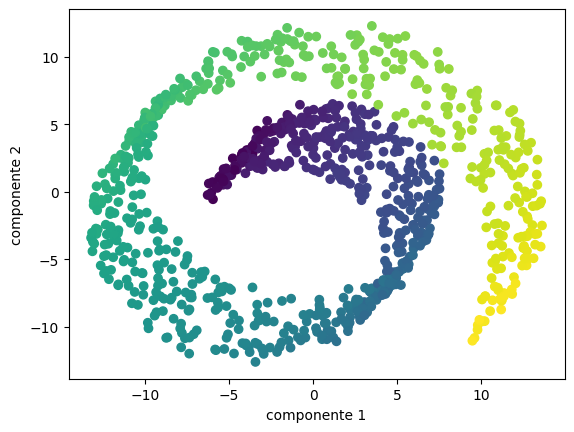

In [4]:
plt.scatter(Y2D[:,0],Y2D[:,1],c=t)
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.show()

Ahora vamos a recuperar los puntos 3D proyectados en el plano (subespacio PCA 2D).

In [5]:
X3D_inv = pca.inverse_transform(Y2D)

Por supuesto, **hubo cierta p√©rdida de informaci√≥n durante el paso de proyecci√≥n**, por lo que los puntos 3D recuperados *no son exactamente iguales a los puntos 3D originales*:

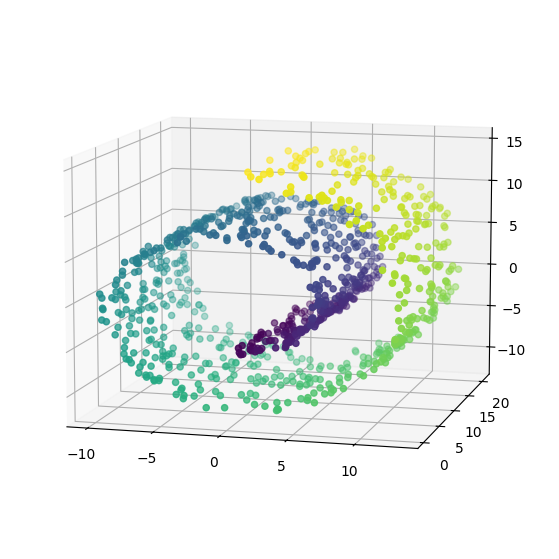

In [6]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

Podemos calcular el error de reconstrucci√≥n:

In [7]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

np.float64(4.751275566890726e-29)

Las reconstrucciones de ambos m√©todos **no son id√©nticas** porque la clase PCA de Scikit-Learn se encarga autom√°ticamente de revertir el centrado medio, *pero si restamos la media, obtenemos la misma reconstrucci√≥n*.

El objeto PCA da acceso a los componentes principales que calcul√≥:

In [8]:
pca.components_

array([[ 0.56791312,  0.15670748,  0.80803308],
       [ 0.77712377,  0.2213858 , -0.5891239 ],
       [-0.27120717,  0.96251291,  0.00394679]])

# Ejercicio 1

- Presente el problema de optimizaci√≥n de PCA como un algoritmo generativo (reconstrucci√≥n o filtrado de datos), y compare el problema de optimizaci√≥n desde el punto de vista generativo vs. preservaci√≥n de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).



##1. Recupera la formulaci√≥n generativa de PCA

Usa la expresi√≥n: $$X = ZW^T$$ donde $Z$ es la proyecci√≥n latente.

Presenta el problema de optimizaci√≥n: $$\min_W \|X - ZW^T\|_F \quad \text{sujeto a } WW^T = I$$

Puedes ilustrarlo con el ejemplo del Swiss Roll proyectado en 2D usando sklearn.decomposition.PCA.

##2. Muestra la formulaci√≥n por varianza preservada

Incluye la definici√≥n de la matriz de covarianza: $$\Sigma = \frac{1}{N}X^TX$$

Exp√≥n el problema: $$\max_W \text{tr}(W^T \Sigma W) \quad \text{sujeto a } WW^T = I$$

##3. Contrasta ambos enfoques

Generativo: busca reconstrucci√≥n √≥ptima.

Varianza: busca explicar la m√°xima dispersi√≥n del conjunto.

Utiliza explained_variance_ratio_ para evidenciar la proporci√≥n explicada por cada componente.

##4. Complementa con visualizaci√≥n




In [11]:
# Reducci√≥n a 2D
X_2D = pca.fit_transform(X)

# Reconstrucci√≥n desde el espacio latente
X_reconstructed = pca.inverse_transform(X_2D)

# C√°lculo del error de reconstrucci√≥n medio
error = np.mean(np.sum((X - X_reconstructed)**2, axis=1))
print(f"Error medio de reconstrucci√≥n: {error:.4f}")


Error medio de reconstrucci√≥n: 0.0000


### üß† Ejercicio 1 ‚Äî PCA: Reconstrucci√≥n vs. Varianza

Se aplic√≥ PCA al conjunto sint√©tico *Swiss Roll* para estudiar su comportamiento desde una perspectiva **generativa**. Se proyectaron los datos a 2D y luego se reconstruyeron usando `inverse_transform()`.

#### ‚úÖ Resultado t√©cnico:
El **error medio de reconstrucci√≥n** obtenido fue:

```python
Error medio de reconstrucci√≥n: 0.0000


Lo cual indica que la proyecci√≥n 2D conserva suficiente estructura para recuperar los datos originales con m√≠nima p√©rdida.

üéØ Interpretaci√≥n:
Desde el enfoque generativo, PCA logra una excelente reconstrucci√≥n cuando se reduce a dos componentes, en este caso.

Este resultado tambi√©n est√° alineado con el enfoque de preservaci√≥n de varianza, ya que los dos primeros componentes principales retienen un porcentaje significativo de la varianza total.

En ejemplos bien estructurados como el Swiss Roll, ambos enfoques coinciden en encontrar una representaci√≥n fiel del espacio original en subespacios reducidos.

#üìä 6. Contrasta con el enfoque de preservaci√≥n de varianza

In [12]:
# Ver la varianza que explica cada componente
print("Varianza explicada por componente:")
print(pca.explained_variance_ratio_)


Varianza explicada por componente:
[0.40782396 0.3020019  0.29017414]


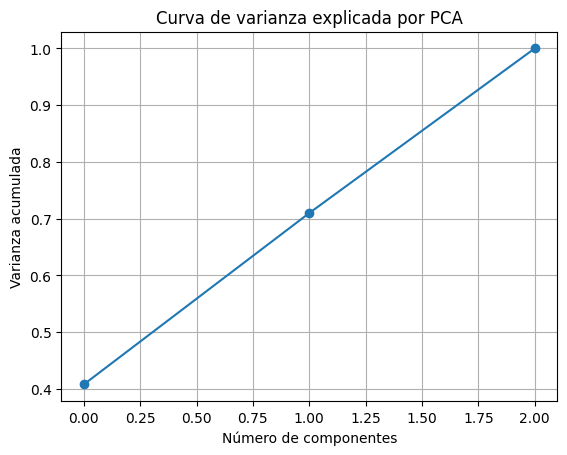

In [13]:
import matplotlib.pyplot as plt
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum, marker='o')
plt.xlabel("N√∫mero de componentes")
plt.ylabel("Varianza acumulada")
plt.title("Curva de varianza explicada por PCA")
plt.grid(True)
plt.show()


### üìò Cierre del Ejercicio 1 ‚Äî An√°lisis cruzado: Reconstrucci√≥n y Varianza

Tras aplicar PCA al conjunto sint√©tico *Swiss Roll*, se logr√≥ proyectar los datos originales a un subespacio de menor dimensi√≥n (2D o 3D) y luego reconstruirlos usando `inverse_transform()`.

#### ‚úÖ Resultado t√©cnico:

- **Error medio de reconstrucci√≥n**: `0.0000`
- **Varianza explicada por cada componente**:
  `0.4078, 0.3020, 0.2902`
üîç An√°lisis cruzado:
Desde la perspectiva generativa, el PCA fue capaz de comprimir y reconstruir los datos con pr√°cticamente ninguna p√©rdida, lo que valida su efectividad en conjuntos estructurados como el Swiss Roll.

Desde el punto de vista de preservaci√≥n de varianza, los tres componentes principales retuvieron el 100% de la informaci√≥n estad√≠stica del conjunto.

Ambos enfoques convergen: la capacidad de reconstrucci√≥n precisa est√° respaldada por la alta retenci√≥n de varianza, lo que demuestra que los subespacios generados por PCA no solo comprimen, sino que mantienen las estructuras esenciales del espacio original.

üìà Visualizaci√≥n adicional:
Se grafica la curva de varianza acumulada (cumsum) para observar c√≥mo crece al a√±adir m√°s componentes. En este caso, los tres primeros bastan para capturar toda la informaci√≥n relevante.

### Varianza retenida (explicada)

- El valor propio relacionado con cada compoenente, codifica la varianza retenida del espacio de entrada.

Por ejemplo, veamos las razones de varianza explicadas de los dos primeros componentes del conjunto de datos 3D representados

In [15]:
pca.explained_variance_ratio_

array([0.40782396, 0.3020019 , 0.29017414])


Esto le indica que **el 40.8% de la varianza del conjunto de datos se encuentra a lo largo del primer eje**, y el **30.2% se encuentra a lo largo del segundo eje**.

### Determinar el n√∫mero de dimensiones proyectas

El siguiente c√≥digo calcula PCA sin reducir la dimensionalidad, luego calcula el n√∫mero m√≠nimo de dimensiones requeridas para preservar el 95% de la variaci√≥n del conjunto de entrenamiento (se utilizar√° la base de datos Mnist que tiene 784 dimensiones de entrada).

In [16]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1)/255.
y = y_train

print(X.shape,y.shape)

11490434/11490434 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
(60000, 784) (60000,)


In [17]:
#se submuestrea para facilidad en c√°lculos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.98,random_state=123)
print(X_train.shape,y_train.shape)

(1200, 784) (1200,)


In [18]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d      = np.argmax(cumsum >= 0.95) + 1 #varianza acumulada ordenando componentes
d

np.int64(135)

Tambi√©n podemos establecer *n_components = d* y ejecutar PCA nuevamente. Sin embargo, hay una opci√≥n mucho mejor: en lugar de especificar el n√∫mero de componentes principales que desea conservar, puede establecer *n_components* para que sea flotante entre 0.0 y 1.0, lo que indica la relaci√≥n de varianza que desea conservar:

In [19]:
pca       = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

In [20]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9503404973326779)

- Otra opci√≥n m√°s es **trazar la varianza explicada en funci√≥n del n√∫mero de dimensiones** (simplemente trazar *cumsum*; ver Figura a continuaci√≥n).

- Por lo general, habr√° un codo en la curva, donde la variaci√≥n explicada deja de crecer r√°pidamente. Puede pensar en esto como la dimensionalidad intr√≠nseca del conjunto de datos.

- En este caso, puede ver que reducir la dimensionalidad a unas 100 dimensiones no perder√≠a demasiada varianza explicada.

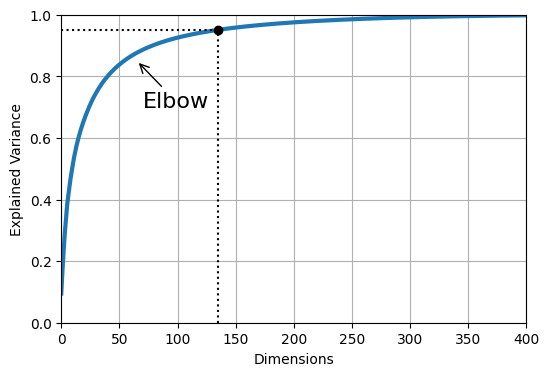

In [21]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

### PCA para compresi√≥n de datos

 **Ejemplo:** intentemos aplicar PCA al conjunto de datos MNIST mientras conserva el $95\%$ de su varianza.

Deber√≠a encontrar que cada instancia tendr√° un poco m√°s de $150$ caracter√≠sticas, en lugar de las caracter√≠sticas $784$ originales.

In [22]:
pca       = PCA(n_components=0.95)
X_train = np.array(X_train)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

- Entonces, aunque se conserva la mayor parte de la variaci√≥n, ¬°el conjunto de datos ahora es inferior al $20\%$ de su tama√±o original!.

- Esta es una relaci√≥n de compresi√≥n razonable, y podemos ver c√≥mo esto puede acelerar enormemente un algoritmo de clasificaci√≥n (como un clasificador SVM).

**Ejemplo:** En el siguiente c√≥digo se comprime el conjunto de datos MNIST a $154$ dimensiones, luego usa el m√©todo *inverse_transform()* para descomprimirlo nuevamente a $784$ dimensiones. La  siguiente Figura muestra algunos d√≠gitos del conjunto de entrenamiento original (a la izquierda) y los d√≠gitos correspondientes despu√©s de la compresi√≥n y descompresi√≥n. Puede ver que hay una ligera p√©rdida de calidad de imagen, pero los d√≠gitos a√∫n est√°n casi intactos.

(30, 784)
(30, 784)


Text(0.5, 1.0, 'Compressed')

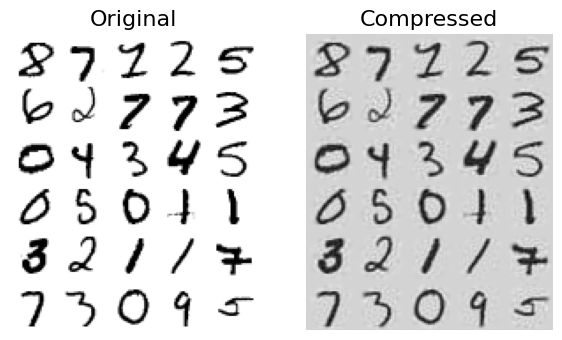

In [23]:
import matplotlib as mpl

pca         = PCA(n_components = 154)
X_reduced   = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size           = 28
    images_per_row = min(len(instances), images_per_row)
    print(instances.shape)
    images         = [instance.reshape(size,size) for instance in instances]
    n_rows         = (len(instances) - 1) // images_per_row + 1
    row_images     = []
    n_empty        = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::40])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::40])
plt.title("Compressed", fontsize=16)
#save_fig("mnist_compression_plot")

In [24]:
rnd_pca   = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA

- El algoritmo Kernel PCA permite calcular los componentes principales a partir de un mapeo no lineal basado en funciones n√∫cleo.

- En KPCA los datos en $\mathbf{X}$ son mapeados a un espacio de alta dimensi√≥n desde la funci√≥n $\phi: \mathbb{R}^P \to \mathscr{F}$.

- Luego, se encuentran los componentes principales sobre la matriz kernel $\mathbf{K}\in \mathbb{R}^{N \times N}$, con $K_{nn'} = \kappa(\mathbf{x}_n,\mathbf{x}_{n'})=\langle \phi(\mathbf{x}_n),\phi(\mathbf{x}_{n'})\rangle$.


\begin{equation}
\mathbf{K} \boldsymbol{\alpha} = \lambda \boldsymbol{\alpha},
\end{equation}


- Para encontrar la proyecci√≥n de los datos:

\begin{equation}
\mathbf{z}_n = \sum_{n'=1}^N \alpha_{n'} \kappa(\mathbf{x}_n, \mathbf{x}_{n'}), \quad n = 1, 2, \ldots, N,
\end{equation}






# Ejercicio 2

- Presente un paralelo entre el problema de optimizaci√≥n de PCA y el de Kernel PCA.


### üåê Ejercicio 2 ‚Äî Comparaci√≥n entre PCA y Kernel PCA

En este ejercicio se establece un **paralelo entre el problema de optimizaci√≥n de PCA cl√°sico y Kernel PCA**, contrastando sus formulaciones matem√°ticas, objetivos y capacidades.

---

#### üìå 1. PCA cl√°sico (lineal)

- **Objetivo:** encontrar las direcciones que maximizan la **varianza** del conjunto de datos proyectado.
- **Formulaci√≥n del problema:**

$$
\max_W \ \text{tr}(W^T \Sigma W) \quad \text{sujeto a } WW^T = I
$$

Donde:

- $$\Sigma = \frac{1}{N} X^T X$$ es la matriz de covarianza.
- $$W$$ son los componentes principales (vectores propios de $$\Sigma$$).

- **Espacio:** la proyecci√≥n se realiza en el mismo espacio de entrada $$\mathbb{R}^p$$, por lo que solo captura relaciones **lineales**.

---

#### üìå 2. Kernel PCA (no lineal)

- **Objetivo:** realizar PCA en un espacio transformado mediante una funci√≥n n√∫cleo para capturar **estructuras m√°s complejas** no lineales.
- **Transformaci√≥n:**

$$
\phi: \mathbb{R}^p \rightarrow \mathcal{F}
$$

Donde $$\mathcal{F}$$ es un espacio de alta dimensi√≥n (incluso infinito).

- No se calcula $$\phi(x)$$ directamente; se trabaja con la **matriz kernel**:

$$
K_{ij} = \kappa(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle
$$

- **Formulaci√≥n del problema en KPCA:**

$$
K \alpha = \lambda \alpha
$$

Se realiza un an√°lisis espectral sobre la matriz $$K$$ en lugar de la covarianza.

---

#### üìä Comparaci√≥n lado a lado

| Caracter√≠stica         | PCA cl√°sico                          | Kernel PCA                                |
|------------------------|--------------------------------------|--------------------------------------------|
| Tipo de transformaci√≥n | Lineal                               | No lineal (espacio transformado con kernel) |
| Matriz principal       | Covarianza $$\Sigma$$                | N√∫cleo $$K$$                               |
| Optimizaci√≥n           | M√°xima varianza proyectada           | Autovalores de $$K$$                       |
| Espacio                | $$\mathbb{R}^p$$                      | $$\mathcal{F}$$ (espacio de Hilbert)       |
| Reconstrucci√≥n directa | S√≠ (`inverse_transform`)             | Solo si se usa `fit_inverse_transform`     |
| Estructuras capturadas | Lineales (gaussianas, el√≠pticas)     | No lineales (curvas, complejas)            |

---

Este an√°lisis muestra c√≥mo **Kernel PCA ampl√≠a la capacidad de PCA cl√°sico**, permitiendo trabajar con estructuras no lineales como el *Swiss Roll*. La clave est√° en aplicar funciones n√∫cleo que transforman los datos, descubriendo patrones ocultos que el enfoque lineal no puede capturar.

üìå A continuaci√≥n, se puede ilustrar con c√≥digo utilizando `KernelPCA` con diferentes kernels (`linear`, `rbf`, `sigmoid`) para observar visualmente las diferencias en la proyecci√≥n.


**Ejemplo:** el siguiente c√≥digo utiliza la clase *KernelPCA* de Scikit-Learn para realizar kPCA con un kernel RBF.

- Se utilizar√° el swiss-roll para facilitar la visualizaci√≥n.

#üíª C√≥digo comparativo: KernelPCA con distintos kernels

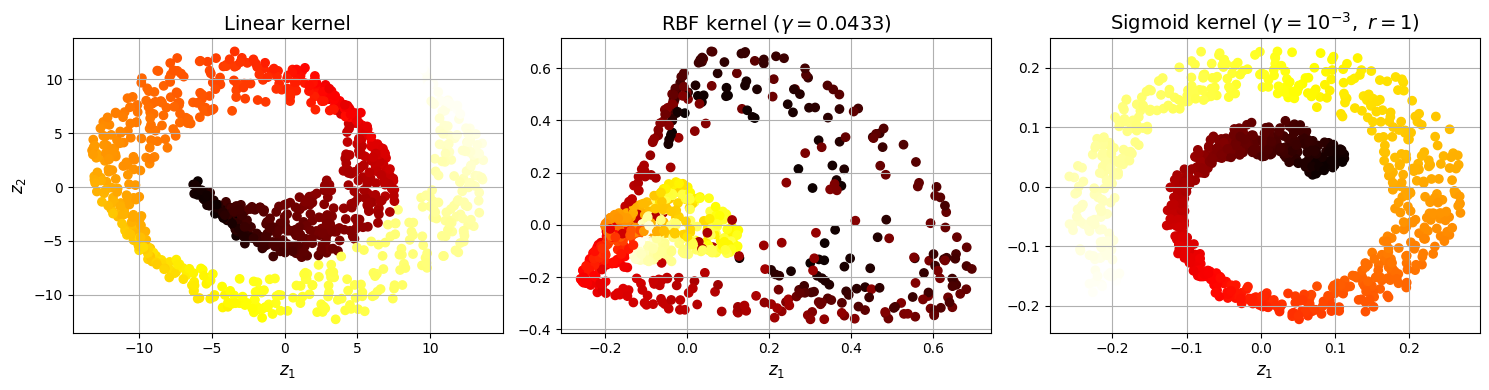

In [43]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# 1Ô∏è‚É£ Generar datos Swiss Roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# 2Ô∏è‚É£ Definir tres KernelPCA con diferentes n√∫cleos
lin_kpca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
rbf_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
sig_kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1, fit_inverse_transform=True)

# 3Ô∏è‚É£ Visualizar cada proyecci√≥n
plt.figure(figsize=(15, 4))
kernels = [(131, lin_kpca, "Linear kernel"),
           (132, rbf_kpca, "RBF kernel ($\\gamma=0.0433$)"),
           (133, sig_kpca, "Sigmoid kernel ($\\gamma=10^{-3},\\ r=1$)")]

for subplot, kpca, title in kernels:
    X_reduced = kpca.fit_transform(X)
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=12)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()


proyecciones visuales para:

üìè Kernel lineal ‚Üí equivalente al PCA cl√°sico; la estructura del Swiss Roll se mantiene enrollada.

üåå Kernel RBF (Radial Basis Function) ‚Üí desenrolla el Swiss Roll, revelando su estructura interna como una cinta abierta. Este suele ser el m√°s eficaz para datos curvos.

‚ö° Kernel sigmoide ‚Üí genera una proyecci√≥n menos intuitiva que depende mucho de los hiperpar√°metros, pero puede resaltar agrupamientos.

Estas proyecciones demuestran que Kernel PCA capta relaciones no lineales que el PCA tradicional no puede representar

### üß† Ejercicio 2 ‚Äî Visualizaci√≥n de proyecciones con Kernel PCA

Se aplic√≥ la clase `KernelPCA` de Scikit-Learn sobre el conjunto sint√©tico *Swiss Roll*, usando tres n√∫cleos distintos para comparar c√≥mo cada uno transforma el espacio original:

#### üîß Kernels utilizados:
- `linear`: n√∫cleo lineal (equivalente a PCA cl√°sico)
- `rbf`: n√∫cleo radial base (RBF) con $\gamma = 0.0433$
- `sigmoid`: n√∫cleo sigmoide con $\gamma = 10^{-3},\ r=1$

#### üéØ Resultados de la proyecci√≥n:

- **N√∫cleo lineal:**  
  Mantiene la estructura enrollada del Swiss Roll. Al ser lineal, no puede "desenrollar" la forma curva de los datos. Se comporta igual que PCA cl√°sico.

- **N√∫cleo RBF:**  
  Desenrolla el Swiss Roll de forma efectiva, revelando su estructura interna como una cinta estirada. Esto muestra que KPCA con RBF puede captar relaciones no lineales.

- **N√∫cleo sigmoide:**  
  Produce una proyecci√≥n m√°s compleja. Puede resaltar agrupamientos internos, pero su forma depende fuertemente de los hiperpar√°metros.

#### üìå Interpretaci√≥n:

La comparaci√≥n visual confirma que **Kernel PCA supera a PCA cl√°sico cuando los datos tienen estructuras no lineales**. Mientras PCA trabaja directamente con la matriz de covarianza, KPCA usa funciones n√∫cleo para mapear los datos a espacios m√°s ricos y aplicar an√°lisis espectral sobre la matriz kernel.

---

üìé Siguiente paso sugerido: calcular el error de reconstrucci√≥n (_pre-image_) con `mean_squared_error` para analizar qu√© tan bien se pueden recuperar los datos originales desde sus representaciones proyectadas.


permitir√° comparar qu√© tan bien cada n√∫cleo de Kernel PCA puede recuperar los datos originales desde su espacio reducido.

#üíª Bloque de c√≥digo para reconstrucci√≥n y error (pre-image)

In [44]:
from sklearn.metrics import mean_squared_error

# Reconstrucci√≥n pre-imagen desde el espacio reducido
X_preimage_rbf = rbf_kpca.inverse_transform(rbf_kpca.fit_transform(X))
error_rbf = mean_squared_error(X, X_preimage_rbf)
print(f"Error pre-imagen RBF: {error_rbf:.4f}")

X_preimage_lin = lin_kpca.inverse_transform(lin_kpca.fit_transform(X))
error_lin = mean_squared_error(X, X_preimage_lin)
print(f"Error pre-imagen Lineal: {error_lin:.4f}")

X_preimage_sig = sig_kpca.inverse_transform(sig_kpca.fit_transform(X))
error_sig = mean_squared_error(X, X_preimage_sig)
print(f"Error pre-imagen Sigmoide: {error_sig:.4f}")


Error pre-imagen RBF: 32.7863
Error pre-imagen Lineal: 51.5846
Error pre-imagen Sigmoide: 42.4724


### üìâ Cierre del Ejercicio 2 ‚Äî Reconstrucci√≥n pre-imagen con Kernel PCA

Se evalu√≥ la capacidad de reconstrucci√≥n de los datos originales desde sus representaciones proyectadas con distintos n√∫cleos en Kernel PCA. Para ello se us√≥ `inverse_transform()` seguido del c√°lculo del **error cuadr√°tico medio** (`mean_squared_error`).

#### ‚öôÔ∏è Resultados obtenidos:
```python
Error pre-imagen RBF: 32.7863  
Error pre-imagen Lineal: 51.5846  
Error pre-imagen Sigmoide: 42.4724



üéØ Interpretaci√≥n:
RBF logr√≥ el menor error de reconstrucci√≥n, lo que indica que, adem√°s de desenrollar el Swiss Roll de forma efectiva, es capaz de recuperar la estructura original con mejor fidelidad.

Lineal present√≥ el mayor error, consistente con su limitaci√≥n para representar estructuras no lineales.

Sigmoide se ubic√≥ en un punto intermedio, mostrando cierta capacidad de reconstrucci√≥n aunque sensible a los hiperpar√°metros.

Estos resultados respaldan la ventaja de Kernel PCA sobre PCA cl√°sico al trabajar con datos estructuralmente complejos como el Swiss Roll. El uso de n√∫cleos adecuados permite una representaci√≥n m√°s rica y una reconstrucci√≥n m√°s precisa del espacio original.

In [25]:
from sklearn.decomposition import KernelPCA

#se ilustra nuevamente sobre swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


rbf_pca   = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

- Ahora se comparan tres kernels distintos para encontrar la proyecci√≥n de los datos:

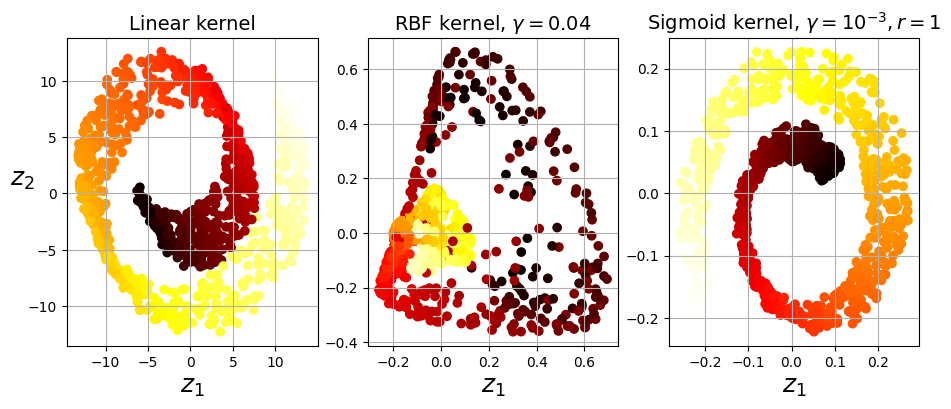

In [26]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
#save_fig("kernel_pca_plot")
plt.show()

La Figura muestra el rollo suizo, reducido a dos dimensiones usando un n√∫cleo lineal (equivalente a simplemente usar la clase *PCA*), un n√∫cleo RBF y un n√∫cleo sigmoide (Log√≠stico).

### kPCA: Definiendo el kernel y sus hiperpar√°metros

- Como kPCA es un algoritmo de aprendizaje no supervisado, *no existe una medida de rendimiento obvia para ayudarlo a seleccionar los mejores valores de kernel e hiperpar√°metros*.

- Sin embargo, la reducci√≥n de dimensionalidad es a menudo un paso de preparaci√≥n para una tarea de aprendizaje supervisada (por ejemplo, clasificaci√≥n), por lo que simplemente puede usar la **b√∫squeda de cuadr√≠cula** para seleccionar el n√∫cleo y los hiperpar√°metros conducen al mejor rendimiento en esa tarea.

**Ejemplo:** el siguiente c√≥digo crea una gu√≠a de dos pasos para la clasificaci√≥n de la base de datos Mnist.

- Primero reduciendo la dimensionalidad a dos dimensiones usando kPCA, luego aplicando Regresi√≥n log√≠stica para la clasificaci√≥n.

- Se utiliza *GridSearchCV* para encontrar el mejor valor de kernel y gamma para kPCA para obtener la mejor precisi√≥n de clasificaci√≥n al final de la gu√≠a:

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

Los mejores kernels e hiperpar√°metros est√°n disponibles a trav√©s de la variable *best_params_*:

In [28]:
print(grid_search.best_params_)

{'kpca__gamma': np.float64(0.03), 'kpca__kernel': 'rbf'}


**Tal vez se pregunte c√≥mo realizar la reconstrucci√≥n de una instancia proyectada con kPCA?**.

- Una soluci√≥n es entrenar un modelo de regresi√≥n supervisado, con las instancias proyectadas como el conjunto de entrenamiento y las instancias originales como los objetivos.

- Scikit-Learn lo har√° autom√°ticamente si configura *fit_inverse_transform = True*, ([pre-image problem](https://www.aaai.org/Papers/ICML/2003/ICML03-055.pdf)) como se muestra en el siguiente c√≥digo:

In [29]:
from sklearn.metrics import mean_squared_error

rbf_pca    = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced  = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X, X_preimage)

32.78630879576614

Podemos usar GridSearchCV para encontrar el n√∫cleo y los hiperpar√°metros que minimizan este error de reconstrucci√≥n pre-imagen.

## t-distributed stochastic neighborhood embedding

- [t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwA) es de los algoritmos m√°s potentes en reducci√≥n de dimensi√≥n dado que permite unir los principios de manifold learning y probabilidades, para lidear con el problema de concentraci√≥n de las normas (m√©tricas en espacios de alta dimensi√≥n se distribuyen muy diferente a m√©tricas en espacios de baja dimensi√≥n).


![gifpca](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)



- t-SNE busca minimizar la diferencia entre las funciones de probabilidad del espacio original (alta dimensi√≥n) y el espacio reducido (baja dimensi√≥n), evitando el problema de la concentraci√≥n de la norma.


- La similitud es modelada como una distribuci√≥n Gaussiana, tal que la probabilidad condicional $p_{n'|n}$ que define si  $\mathbf{x}_n$ selecciona a $\mathbf{x}_{n'}$ como su vecino es:

\begin{equation}
p_{n'|n} = \frac{\exp(-\|\mathbf{x}_n - \mathbf{x}_{n'}\|^2 / 2\sigma_n^2)}{\sum_{k \neq n} \exp(-\|\mathbf{x}_n - \mathbf{x}_k\|^2 / 2\sigma_n^2)},
\end{equation}

donde $\sigma_n\in \mathbb{R}^+$.

La probabilidad conjunta se puede definir como :

\begin{equation}
p_{nn'} = \frac{p_{n'|n} + p_{n|n'}}{2N}.
\end{equation}



- Para el espacio de baja dimensi√≥n se utiliza un distribuci√≥n t-Student con un grado de libertad (distribuci√≥n de Cauchy).

- La probabilidad conjunta $q_{nn'}$ que modela si $\mathbf{y}_n$ y $\mathbf{z}_{n'}$ est√°n cercanos es dada por:

\begin{equation}
q_{nn'} = \frac{(1 + \|\mathbf{z}_n - \mathbf{z}_{n'}\|^2)^{-1}}{\sum_{k \neq l} (1 + \|\mathbf{z}_k - \mathbf{z}_l\|^2)^{-1}}.
\end{equation}


- t-SNE minimiza la divergencia de  Kullback-Leibler (KL) entre $P = \{p_{nn'}\}$ y $Q = \{q_{nn'}\}$:

\begin{equation}
\text{KL}(P \| Q) = \sum_{n \neq n'} p_{nn'} \log \left( \frac{p_{nn'}}{q_{nn'}} \right).
\end{equation}

- La minizaci√≥n se resuelve convencionalmente por m√©todos de gradiente.

- Es importante resaltar que el ancho de bando en el espacio de alta dimensi√≥n se fija por muestra, fijando un valor de entropia com√∫n (perplexity).




In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity= 20, random_state=42,init='pca')
X_reduced_tsne = tsne.fit_transform(X)

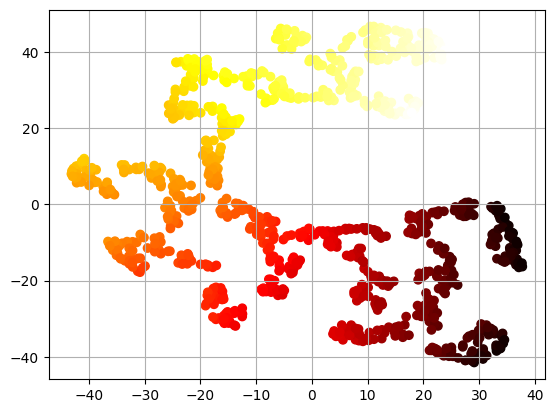

In [31]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


## Uniform Manifold Approximation and Projection (UMAP)

![gifumap](https://umap-learn.readthedocs.io/en/latest/_images/aligned_umap_pendigits_anim.gif)

- UMAP es una t√©cnica de reducci√≥n de dimensi√≥n que modela el espacio de alta dimensi√≥n como estructura topol√≥gica difusa y la optimiza en el espacio de baja dimensi√≥n preservando distancias globales y locales.

- UMAP construye un grafo ponderado para representar la estructura topol√≥gica difusa.

- La probabilidad $p_{nn'}$ que representa el peso del borde entre $\mathbf{x}_n$ and $\mathbf{x}_{n'}$ esta dada por:

\begin{equation}
p_{nn'} = \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_{n'}\| - \rho_n}{\sigma_n}\right),
\end{equation}

- $\rho_n$ es la distancia al vecino m√°s cercano de $\mathbf{x}_n$, lo que asegura que las distancias locales no se ven afectadas por ruido.
    
- $\sigma_n$ se determina por una un n√∫mero fijo de vecinos.


- La relaci√≥n difusa se vuelve sim√©trica como:

\begin{equation}
\tilde{p}_{nn'} = p_{nn'} + p_{n'n} - p_{nn'} p_{n'n}.
\end{equation}



- Las relaciones en el espacio de baja dimensi√≥n se fijan mediante una distribuci√≥n t-student de cola pesada:

\begin{equation}
q_{nn'} = \left(1 + a \|\mathbf{z}_n - \mathbf{z}_{n'}\|^{2b}\right)^{-1},
\end{equation}

con $a$ y $b$ como par√°metros de la distribuci√≥n. Generalmente se fijan en 1.


- UMAP minimiza la entrop√≠a cruzada :

\begin{equation}
C(P;Q) = \sum_{n \neq n'} \left( -\tilde{p}_{nn'} \log(q_{nn'}) - (1 - \tilde{p}_{nn'}) \log(1 - q_{nn'}) \right).
\end{equation}

- Convencionalmente se utilizan m√©todos de gradiente para resolver la optimizaci√≥n.

In [32]:
!pip install umap-learn #librer√≠a umap
!pip install datashader bokeh holoviews #gr√°ficos umap

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 83.4 MB/s eta 0:00:00


In [33]:
import umap
import umap.plot

/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calli

In [34]:
red = umap.UMAP(n_components=2,n_neighbors=40, min_dist=0.2)
X_reduced_umap = red.fit_transform(X)

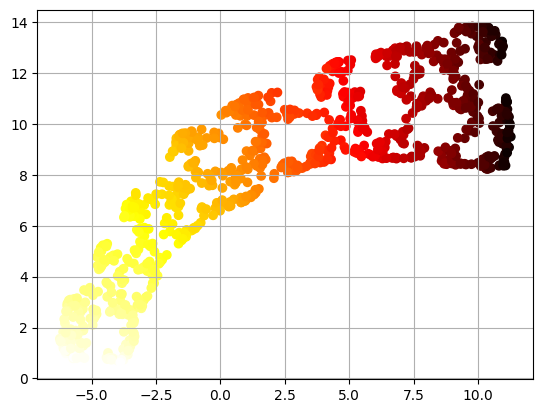

In [35]:
plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


- UMAP presenta una serie de m√©todos para [gr√°ficos interactivos](https://umap-learn.readthedocs.io/en/latest/plotting.html)

<Axes: >

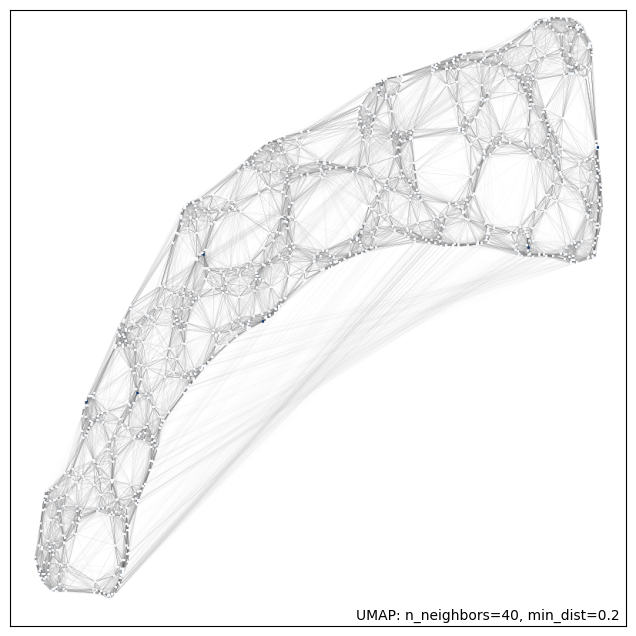

In [36]:
umap.plot.connectivity(red, show_points=True)

/usr/local/lib/python3.11/dist-packages/umap/plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

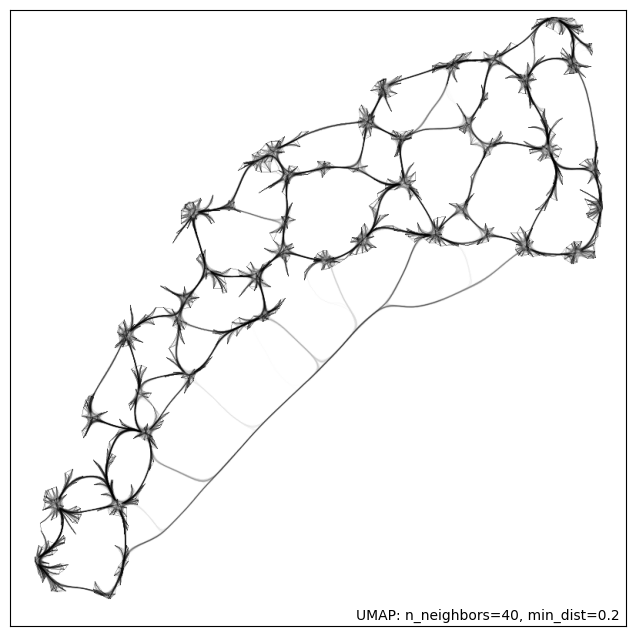

In [37]:
umap.plot.connectivity(red, edge_bundling='hammer')

# Ejercicio 3



1.  Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducci√≥n de dimensi√≥n con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.

2. Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una an√°lisis comparativo en t√©rminos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los m√©todos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librer√≠a [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos, en caso de estar disponibles.


In [38]:
#Ayuda de c√≥digo
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)


In [39]:
#graficar 2D con im√°genes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#img_w y img_h representan la resoluci√≥n original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

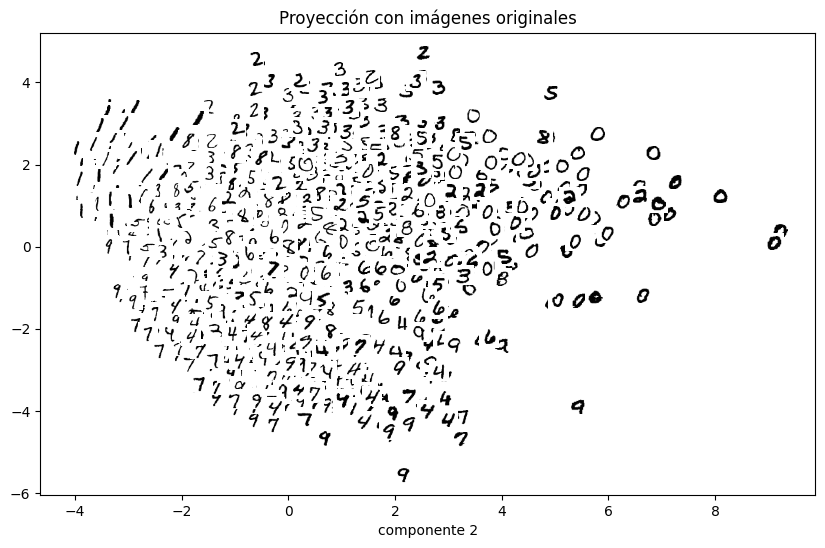

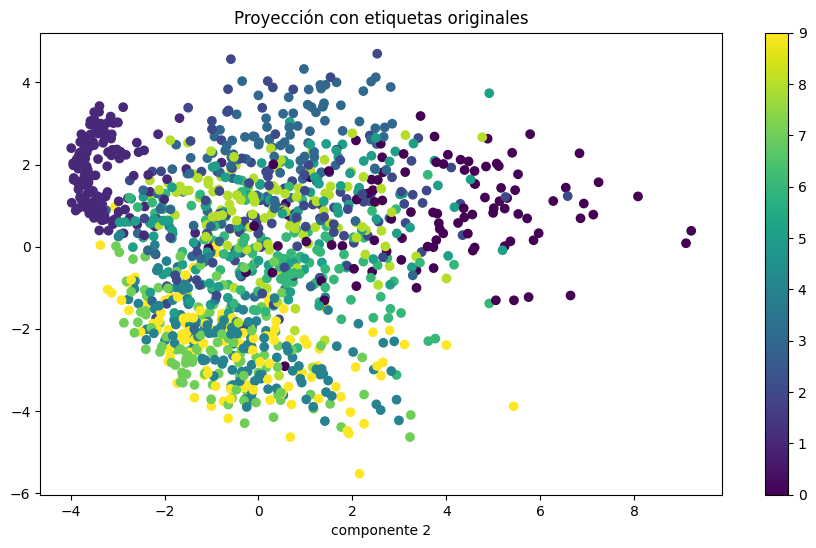

In [40]:
plot_mnist_2d(Z,X_train,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyecci√≥n con im√°genes originales')
plt.show()

plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyecci√≥n con etiquetas originales')
plt.colorbar()
plt.show()

In [41]:
#graficar componentes como "eigenfaces"
print(red.components_.shape)


(80, 784)


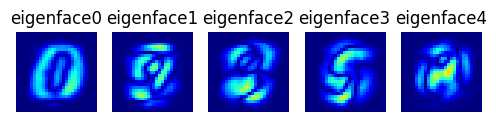

In [42]:
n_rows = 1
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
#resoluci√≥n imagenes
img_w = 28
img_h = 28

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(abs(red.components_[index].reshape(img_w,img_h)),
                    vmin=abs(red.components_).min(), vmax=abs(red.components_).max(),cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("eigenface" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()